In [1]:
pip install TextBlob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Setup
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import scrolledtext

nltk.download('punkt')

# Load the dataset
# Try reading with the 'python' engine to handle potential parsing issues
df = pd.read_csv('Nutrion_check.csv', engine='python')
df.dropna(inplace=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANISA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
print(df.columns)

Index(['Food', 'Category', 'Calories (kcal)', 'Protein (g)', 'Fat (g)',
       'Vitamins', 'Calcium (mg)', 'Health_Rating'],
      dtype='object')


In [ ]:
# Initial inspection
print("--- Data Head ---")
print(df.head())

--- Data Head ---
       Food   Category  Calories (kcal)  Protein (g)  Fat (g)  Vitamins  \
0     Apple      Fruit               95          0.5      0.3         C   
1  Broccoli  Vegetable               55          3.7      0.6      C, K   
2    Banana      Fruit              105          1.3      0.4     B6, C   
3    Carrot  Vegetable               41          0.9      0.2  A, K, B6   
4     Pizza  Junk Food              285         12.0     10.0    A, B12   

   Calcium (mg) Health_Rating  
0            11       Healthy  
1            47       Healthy  
2             5       Healthy  
3            33       Healthy  
4           200     Unhealthy  


In [5]:
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food             10 non-null     object 
 1   Category         10 non-null     object 
 2   Calories (kcal)  10 non-null     int64  
 3   Protein (g)      10 non-null     float64
 4   Fat (g)          10 non-null     float64
 5   Vitamins         10 non-null     object 
 6   Calcium (mg)     10 non-null     int64  
 7   Health_Rating    10 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 772.0+ bytes


In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Food               0
Category           0
Calories (kcal)    0
Protein (g)        0
Fat (g)            0
Vitamins           0
Calcium (mg)       0
Health_Rating      0
dtype: int64


In [7]:
# Drop rows with missing values in features
# Define the features list - replace with your actual feature column names
features = ['Food'] # Add other relevant column names here if needed

# Removed 'HighWaste' as it caused a KeyError
df.dropna(subset=features, inplace=True)

In [8]:
# Drop rows with missing values in features or target
# Assuming 'HighWaste' is not a required column for dropping missing values based on the error and previous comments.
# If you intended to use a different column, replace 'HighWaste' with the correct column name.
df.dropna(subset=features, inplace=True)

In [9]:
# Sentiment Analysis Function
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # -1 to 1 scale

df['sentiment'] = df['Category'].apply(analyze_sentiment)

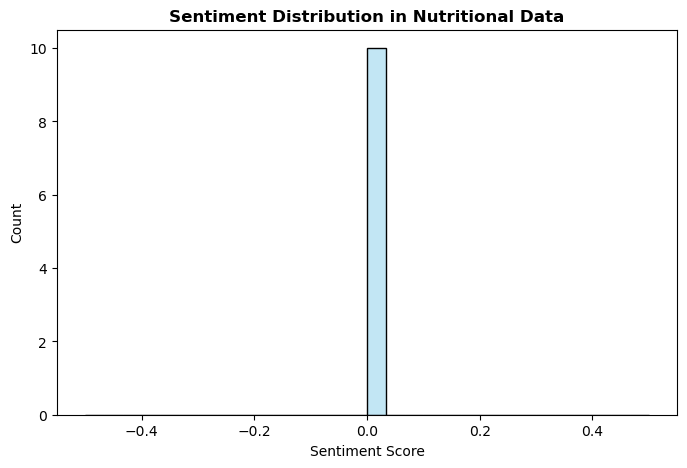

In [10]:
# Visual Insight
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Distribution in Nutritional Data', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


💡 Best Match From Dataset:
📌 Food: Apple
📂 Category: Fruit
🌟 Health_Rating: Healthy
🔥 Calories: 95
💪 Protein: 0.5 g
🥑 Fat: 0.3 g
🅰️ Vitamins : C
🦴 Calcium: 11

👋 Goodbye! Stay safe and healthy.
Vitamins: C
Health Rating: Healthy


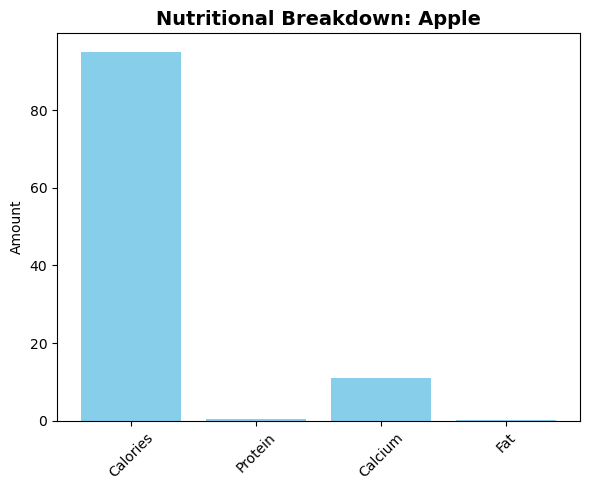


👋 Goodbye! Stay safe and healthy.


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load your CSV dataset
data = pd.read_csv("Nutrion_check.csv")

def answer_nutrition_query(data=data, threshold=0.1):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(data['Food'].astype(str))

    while True:
        user_question = input("\n💬 Ask a nutrition-related question (or type 'exit' to quit): ").strip().lower()

        if user_question in ['exit', 'quit']:
            print("\n👋 Goodbye! Stay safe and healthy.")
            break

        question_vec = vectorizer.transform([user_question])
        similarity_scores = cosine_similarity(question_vec, tfidf_matrix)
        best_match_index = similarity_scores.argmax()
        best_score = similarity_scores[0, best_match_index]

        if best_score < threshold:
            print("\n❌ This query is not recommended.")
            continue

        result = data.iloc[best_match_index]

        print("\n💡 Best Match From Dataset:")
        print(f"📌 Food: {result['Food']}")
        print(f"📂 Category: {result['Category']}")
        print(f"🌟 Health_Rating: {result['Health_Rating']}")
        print(f"🔥 Calories: {result['Calories (kcal)']}")
        print(f"💪 Protein: {result['Protein (g)']} g")
        print(f"🥑 Fat: {result['Fat (g)']} g"  )
        print(f"🅰️ Vitamins : {result['Vitamins']}")
        print(f"🦴 Calcium: {result['Calcium (mg)']}")
        
    

        # Visual chart
        nutrients = {
    'Calories': float(result['Calories (kcal)']),
    'Protein': float(result['Protein (g)']),
    'Calcium': float(result['Calcium (mg)']),
    'Fat': float(result['Fat (g)'])

}
    # Optional: Print non-numeric fields separately
    print("Vitamins:", result['Vitamins'])
    print("Health Rating:", result['Health_Rating'])  # just print as text


    
    plt.figure(figsize=(6, 5))
    plt.bar(nutrients.keys(), nutrients.values(), color='skyblue')
    plt.title(f"Nutritional Breakdown: {result['Food']}", fontsize=14, fontweight='bold')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\n👋 Goodbye! Stay safe and healthy.")

# Start the chat loop
answer_nutrition_query()
